## Workshop 4
### File Input and Output (I/O)

**Submit this notebook to Gradescope to receive a grade for this Workshop.**

Please complete workshop activities in code cells in this iPython notebook. The activities titled **Practice** are purely for you to explore Python. Some of them may have some code written, and you should try to modify it in different ways to understand how it works. Although no particular output is expected at submission time, it is _highly_ recommended that you read and work through the practice activities before or alongside the exercises. However, the activities titled **Exercise** have specific tasks and specific outputs expected. Include comments in your code when necessary. 

**The assignment should be submitted on Gradescope (the .pdf file). Please label it by your student ID number (SIS ID)**

[Exercises start here](#exercises)

In this notebook, we're going to explore some ways that we can store data in files, and extract data from files. Let's just get all of the importing out of the way:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## Practice: Basic Writing and Reading ASCII Files

Think of ASCII files as text files. You can open them using a text editor (like vim or emacs in Unix, or Notepad in Windows) and read the information they contain directly. There are a few ways to produce these files, and to read them once they've been produced. In Python, the simplest way is to use file objects. 

Let's give it a try. We create an abstract file object by calling the function `open( filename, access_mode )` and assigning its return value to a variable (usually `f`). The argument `filename` just specifices the name of the file we're interested in, and `access_mode` tells Python what we plan to do with that file:  

    'r': read the file  
    'w': write to the file (creates a new file, or clears an existing file)
    'a': append the file  
     
Note that both arguments should be strings.
For full syntax and special arguments, see documentation at https://docs.python.org/2/library/functions.html#open

In [2]:
f = open( 'welcome.txt', 'w' )

**A note of caution**: as soon as you call `open()`, Python creates a new file with the name you pass to it if you open it in write mode (`'w'`). Python will overwrite existing files if you open a file of the same name in write ('`w`') mode.

Now we can write to the file using `f.write( thing_to_write )`. We can write anything we want, but it must be formatted as a string.

In [3]:
topics = ['Data types', 'Loops', 'Functions', 'Arrays', 'Plotting', 'Statistics']

In [4]:
f.write( 'Welcome to Physics 77, Spring 2022\n' ) # the newline command \n tells Python to start a new line
f.write( 'Topics we will learn about include:\n' )
for top in topics:
    f.write( top + '\n')
f.close()                                         # don't forget this part!

**Practice 1:** Use the syntax you have just learned to create an ASCII file titled "`sine.txt`" with two columns containing 20 x and 20 y values. The x values should range from $0$ to $2\pi$ - you can use `np.linspace()` to generate these values (as many as you want). The y values should be $y = sin(x)$ (you can use `np.sin()`) for this. Then, use a `for` loop as above to write a new line for each pair of x and y values. To make sure that each x,y pair is on a new line, remember to add `\n` to the end of each line like above. To separate the values by a tab so that the columns are nicely aligned, you can use the "character" `\t`.  So `\n` inserts a new line and `\t` inserts a tab. You may wish to use some kind of string formatting to decimals from running too far. Here is an example with just one data point:

    x = 0.5 * np.pi
    y = np.sin(x)
    print("%.5f \t %.5f" % (x,y))

Pay close attention to the fact that when you use the `write` function, the argument that you pass to it needs to be a string.

In [5]:
# Code for Practice 1
f = open( 'sine.txt', 'w' )
x = np.linspace(0, 2 * np.pi, 20)
y = np.sin(x)
for i in range(20):
    f.write('%.5f \t %.5f\n' % (x[i],y[i]))
f.close()

Now we will show how to *read* the values from `welcome.txt` back out:

In [6]:
f = open( 'welcome.txt', 'r' )
for line in f:
    print(line.strip())
f.close()

Welcome to Physics 77, Spring 2022
Topics we will learn about include:
Data types
Loops
Functions
Arrays
Plotting
Statistics


**Practice 2:** In the cell immediately above, you see that we print `line.strip()` instead of just printing `line`. Remove the `.strip()` part and see what happens. 

Suppose we wanted to skip the first two lines of `welcome.txt` and print only the list of topics `('Data types', 'Loops', 'Functions', 'Arrays', 'Plotting', 'Statistics')`. We can use `readline()` to "read" the first two lines but not store their value, thereby ignoring them.

In [7]:
f = open( 'welcome.txt', 'r' )
f.readline()
f.readline() # skip the first two lines
topicList = []
for line in f:
    topicList.append(line.strip())
f.close()
print(topicList)

['Data types', 'Loops', 'Functions', 'Arrays', 'Plotting', 'Statistics']


Python reads in spacing commands from files as well as strings. The `.strip()` just tells Python to ignore those spacing commands. What happens if you remove it from the code above?

**Practice 3:** Use the syntax you have just learned to read back each line of x and y values from the `sine.txt` file that you just wrote in Practice 1. Don't worry about breaking up the lines into individual values quite yet.

In [8]:
# Code for Practice 3
f = open( 'sine.txt', 'r' )
valueList = []
for line in f:
    valueList.append(line.strip())
f.close()
print(valueList)

['0.00000 \t 0.00000', '0.33069 \t 0.32470', '0.66139 \t 0.61421', '0.99208 \t 0.83717', '1.32278 \t 0.96940', '1.65347 \t 0.99658', '1.98416 \t 0.91577', '2.31486 \t 0.73572', '2.64555 \t 0.47595', '2.97625 \t 0.16459', '3.30694 \t -0.16459', '3.63763 \t -0.47595', '3.96833 \t -0.73572', '4.29902 \t -0.91577', '4.62972 \t -0.99658', '4.96041 \t -0.96940', '5.29110 \t -0.83717', '5.62180 \t -0.61421', '5.95249 \t -0.32470', '6.28319 \t -0.00000']


### Practice Reading in Numerical Data as Floats

Numerical data can be somewhat trickier to read in than strings. In the practices above, you read in `sine.txt` but each line was a `string` not a pair of `float` values. Let's read in a file I produced in another program, that contains results from a BaBar experiment, where we searched for a "dark photon" produced in e+e- collisions. The data are presented in two columns: 

    mass    charge

Every time we read in a new line, it is going to start out being a `string`. To convert a line like

    1.57079      1.00000
    
into a pair of values we need to do two things. The first is we need to split that string into two pieces. Fortunately, there is a function to do that for us. Suppose that we read in a `line` and we want to split it. We can do it as follows:

    line.split()

For the line above, calling `.split()` would return the following `list`:

    ['1.57079','1.00000']
    
From there, we need to convert each value in the list into a `float` and store those values somewhere. This can be done using the `float()` function:

    x_values = []
    y_values = []
    split_values = ['1.57079','1.00000']
    x_values.append(float(split_values[0]))
    y_values.append(float(split_values[1]))

Now `x_values` is a `list` containing 1 element which is the `float` value `1.57079` and `y_values` is a `list` containing 1 element which is the `float` value `1.00000`.

In [9]:
# Example using BaBar_2016.dat

f = open('BaBar_2016.dat', 'r')
# read each line, split the data wherever there's a blank space,
# and convert the values to floats

# lists where we will store the values we read in
mass = []
charge = []
for line in f:
    tokens = line.split()
    mass.append(float(tokens[0]))
    charge.append(float(tokens[1]))
f.close()

We got it; let's plot it!

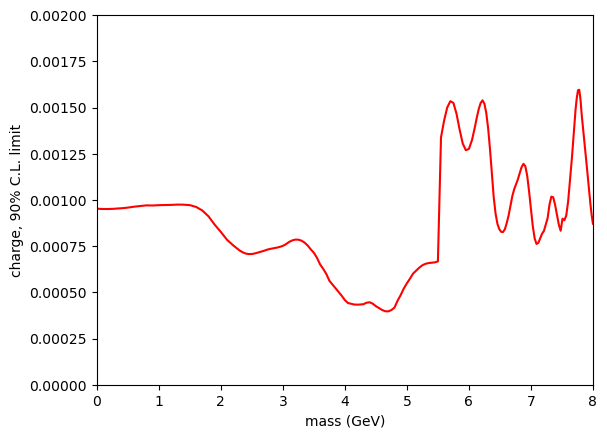

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(mass, charge, 'r-' )
plt.xlim(0, 8)
plt.ylim(0, 2e-3)
plt.xlabel('mass (GeV)')
plt.ylabel('charge, 90% C.L. limit')
plt.show()

**Practice 4:** Use the syntax you have just learned to read back each line of x and y values from the sine.txt file that you wrote in Practice 1, and split each line into `float` values and store them. Then, plot your stored x and y values to make sure you have done everything correctly

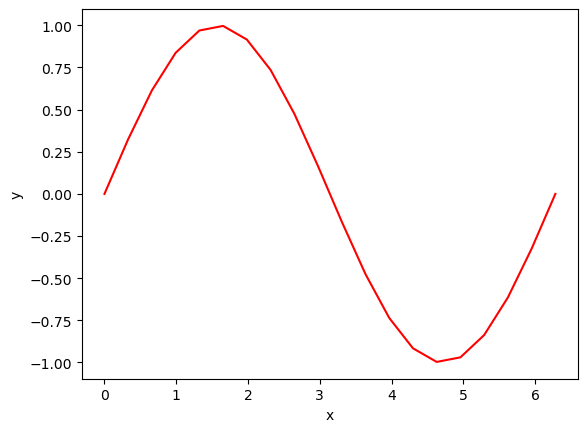

In [11]:
# Code for Practice 4
f = open( 'sine.txt', 'r' )
x = []
y = []
for line in f:
    tokens = line.strip().split()
    x.append(float(tokens[0]))
    y.append(float(tokens[1]))
f.close()
plt.plot(x, y, 'r-' )
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Of course, you already know of another way to read in values like this: `numpy.loadtxt()` and `numpy.genfromtxt()`. If you have already been using those, feel free to move on. Otherwise, take a moment to make yourself aware of these functions as they will massively simplify your life.

Fortunately, Python's `numpy` library has functions for converting file information into numpy arrays, which can be easily analyzed and plotted. The above can be accomplished with a lot less code (and a lot less head scratching!)

The `genfromtxt` function takes as it's argument the name of the file you want to load, and any optional arguments you want to add to help with the loading and formatting process. Some of the most useful optional arguments are:  

  **dtype**: data type of the resulting array  
  **comments**: the character that indicates the start of a comment (e.g. '#')  
              lines following  these characters will be ignored, and not read into the array  
  **delimiter**: the character used to separate values. Often, it's whitespace,   
   but it could also be ',', '|', or others  
  **skip_header**: how many lines to skip at the beginning of the file  
  **skip_footer**: how many lines to skip at the end of the file  
  **use_cols**: which columns to load and which to ignore  
  **unpack**: If True (the default is False), the array is transposed 
    (i.e., you can a set of columns, not a set of rows.) You can accomplish the same thing with `genfromtxt( file, opt_args,...).T`

Reload the spectral data and reproduce the plot above using `loadtxt` or `genfromtxt`.   
**Hint:** You may find it helpful to use `numpy.split( array, N )`, which splits `array` into
`N` equal-length parts, and returns them as a list.

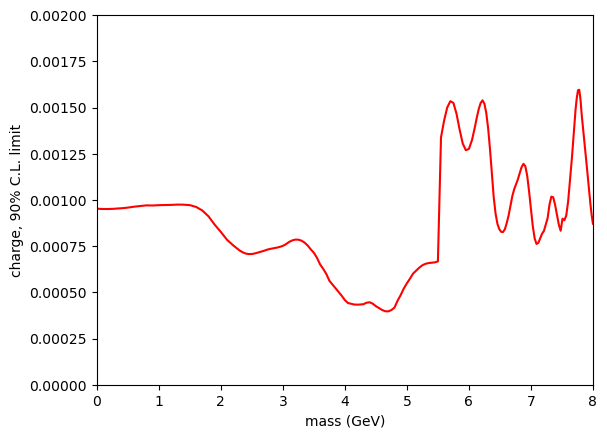

In [12]:
# Same plot as before but now using numpy functions to load the data

import numpy as np
mass, charge = np.loadtxt('BaBar_2016.dat', unpack = True)
plt.plot(mass, charge,'r-')
plt.xlim(0, 8)
plt.ylim(0, 2e-3)
plt.xlabel('mass (GeV)')
plt.ylabel('charge, 90% C.L. limit')
plt.show()

## Exercises



**Exercise 1:** This exercise is meant to put many of the skills you have practiced thus far together. In this exercise, we are going to use I/O methods to see if we can find some correlations in some fake housing data. You will need the following files which should be in your directory:

    house_locs_rent.txt
    bus_stops.txt
    grocery_stores.txt

The file `house_locs_rent.txt` is a list of the locations of 500 houses and ther respective rents, and it has 3 columns:
    
    x-coordinate y-coordinate rent (in USD)

The file `bus_stops.txt` is a list of the locations of bus stops and it has 2 columns:

    x-coordinate y-coordinate

The file `grocery_stores.txt` is a list of the locaitons of grocery stores and it has 2 columns: 

    x-coordinate y-coordinate

All 3 files have one-line headers that you will want to ignore when loading the data. The goal of the exercise is to determine how much of the variation in the rent is predicted by variation in the distance between a house and its closest bus stop or by the distance between a house and its closest grocery store.

To determine this, for each of the 500 houses, you will need to first calculate its distance to its nearest bus stop and its distance to its nearest grocery store.

Then, we will use a measure called the Pearson correlation coefficient (which you will use in Homework04) to give an estimate of how much of the variation in the rent is predicted by variation in these distances. The Pearson correlation coefficient is defined as follows:

### Correlation Coefficient

Suppose I have $N$ data points each with two variables $X_i$ and $Y_i$, where $i = 1\dots N$. Suppose I want to know how much of the variation in $Y$ is predicted by the variation in $X$. The correlation coefficient $R$ is a value between -1 and 1 with the following meaning: when $R=0$, $X$ and $Y$ are independent of each other. When $R>0$, we say they are positively correlated because if $X$ increases we can expect that $Y$ will increase as well. When $R<0$ we say they are negatively or oppositely correlated because if $X$ increases we can expect that $Y$ will decrease. $R$ is defined as follows:

$$R = \frac{\mathbb{E}[(X_i - \mu_X)(Y_i - \mu_Y)]}{\sigma_X \sigma_Y} = \frac{1}{N \sigma_X \sigma_Y} \sum_{i=1}^N 
(X_i - \mu_X)(Y_i - \mu_Y)$$

where $\mu_X$ is the average of $X_i$ over the dataset, $\mu_Y$ is the average of $Y_i$ over the dataset, $\sigma_X$ is the standard deviation of $X_i$ over the dataset, and $\sigma_Y$ is the standard deviation of $Y_i$ over the dataset. For calculating those quantities, you may find `np.mean()` and `np.std()` helpful.

**However**, you must write your *own* correlation coefficient function. It can use `np.mean()` and `np.std()` but it should not call `np.cov` or `np.corrcoef` . 

**Output:** Your code should contain a function to calculate correlation coefficients as well as any other functions that you want to write (for example, a distance function, a minimum distance function...). The output should be the correlation coefficients between the pairs of variables (minimum distances to bus stops, minimum distances to grocery stores, rents) appropriately labeled. Also, create a CSV file titled `distances_rents.csv` and write the values of the minimum distances to the bus_stop and grocery store for each house along with its rent. For example, if the closest bus stop to the first house is 0.5 away and the closest grocery store to the first house is 1.5 away and the rent of the first house is 1250, then the first line of the CSV should read:

    0.5,1.5,1250

**Optional:** See if you can guess how I generated this fake data. To help sharpen your guess, try transforming the variables before computing the correlation coefficients. If the magnitude of the correlation coefficients goes up, that can be an indicator that you have found the correct form of the function. 

In [13]:
# Code for Exercise 1 goes here
f = open( 'house_locs_rent.txt', 'r' )
f.readline()
hlc_x = []
hlc_y = []
hlc_r = []
for line in f:
    tokens = line.strip().split()
    hlc_x.append(float(tokens[0]))
    hlc_y.append(float(tokens[1]))
    hlc_r.append(float(tokens[2]))
f.close()

f = open( 'bus_stops.txt', 'r' )
f.readline()
bs_x = []
bs_y = []
for line in f:
    tokens = line.strip().split()
    bs_x.append(float(tokens[0]))
    bs_y.append(float(tokens[1]))
f.close()

f = open( 'grocery_stores.txt', 'r' )
f.readline()
gs_x = []
gs_y = []
for line in f:
    tokens = line.strip().split()
    gs_x.append(float(tokens[0]))
    gs_y.append(float(tokens[1]))
f.close()

min_bs = [float('inf')] * 500
min_gs = [float('inf')] * 500
for i in range(500):
    for j in range(len(bs_x)):
        d = np.sqrt((hlc_x[i] - bs_x[j]) ** 2 + (hlc_y[i] - bs_y[j]) ** 2)
        if d < min_bs[i]:
            min_bs[i] = d
    for j in range(len(gs_x)):
        d = np.sqrt((hlc_x[i] - gs_x[j]) ** 2 + (hlc_y[i] - gs_y[j]) ** 2)
        if d < min_gs[i]:
            min_gs[i] = d

mu_bs = np.mean(min_bs)
mu_gs = np.mean(min_gs)
mu_r = np.mean(hlc_r)
sigma_bs = np.std(min_bs)
sigma_gs = np.std(min_gs)
sigma_r = np.std(hlc_r)
s_bs = 0
s_gs = 0
for i in range(500):
    delta_r = hlc_r[i] - mu_r
    s_bs += (min_bs[i] - mu_bs) * delta_r
    s_gs += (min_gs[i] - mu_gs) * delta_r
col_bs = s_bs / 500 / sigma_bs / sigma_r
col_gs = s_gs / 500 / sigma_gs / sigma_r
print('col(bus station, rent) = %.5lf\ncol(grocery store, rent) = %.5lf' % (col_bs, col_gs))

f = open( 'distances_rents.csv', 'w' )
f.write('min dist to bus stop, min dist to grocery store, rent\n')
for i in range(500):
    f.write('%.5lf, %.5lf, %.5lf\n' % (min_bs[i], min_gs[i], hlc_r[i]))
f.close()

col(bus station, rent) = -0.23925
col(grocery store, rent) = -0.22559
